## Identify overlapping genes between extTADA (FDR < 0.3) and other gene sets

There are 309 genes identified by the TADA methods (FDR < 0.3)

For each gene set which includes N genes, there are main steps to calculate significant value:

1. Count the number of genes overlapping between the 309 genes and the gene set, nG.

2. For i from 1 to K (times)

    - Randomly choose a set of N genes from all genes (>20000 genes).
    
    - Count the number of genes overlapping between the 309 genes and the random gene set, $M_i$.
    
3. Calculate p value for the gene set, using the formula:

*pValue = length(vM[vM >= nG])/K *


*pValue = 1 - pnorm(nG, mean(vM), sd(vM))* (Not use)

with $vM = c(M_1, M_2, ..M_K)$
    

In [4]:
xAll <- readLines("../data/list.allGenes.txt")
xFMRP <- readLines("../data/list.FMRP.txt")
xResult <- readLines("../data/List.309genes.FDR03.from.scz2016.txt.sort")


## List Genes from 108 loci

In [5]:
x1 <- readLines("../data/list.proteinCodingGenes.from108.txt.sort")

p value: 0.03036


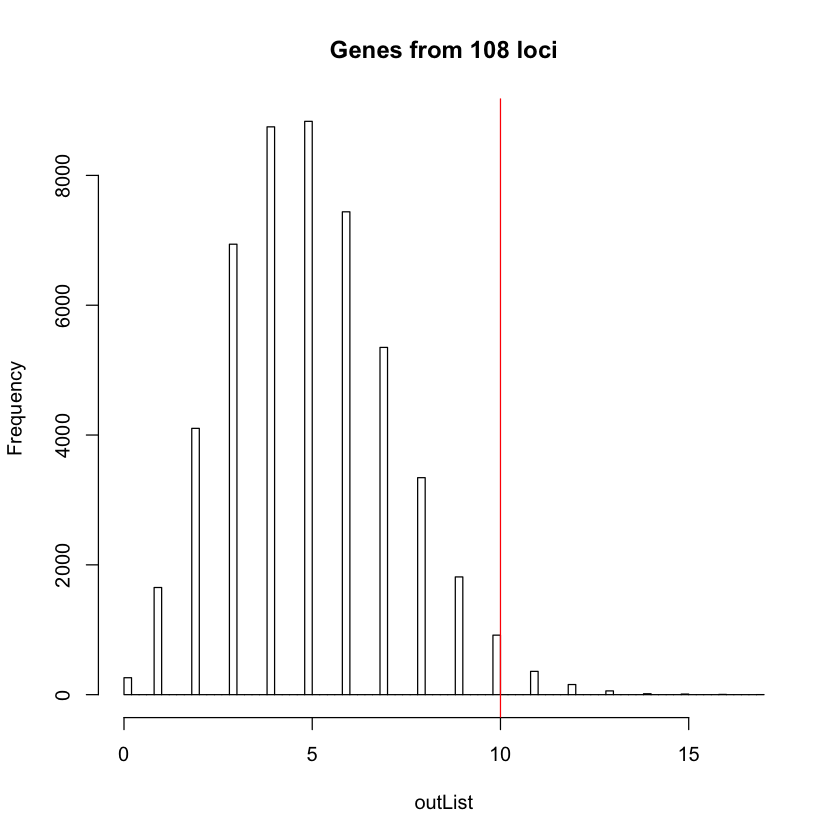

In [8]:
pList <- NULL
nG <- NULL
lGeneSet <- NULL

xFMRP <- x1
xFMRP <- unique(xFMRP)

l1 <- length(xFMRP)

    
nSample <- 50000 ##Number of sampling from all genes
outList <- NULL

xIntersect <- length(intersect(xFMRP, xResult))

for (i in 1:nSample){
  tempGene <- sample(xAll, l1)
  outList[i] <- length(intersect(tempGene, xResult))
  
}

#plot(density(outList))
#abline(v = xIntersect)

message("p value: ", length(outList[outList >= xIntersect])/nSample)

    hist(outList, 100, main = "Genes from 108 loci", xlim = range(c(outList, xIntersect + 1)))
    abline(v = xIntersect, col = 'red')
    



## Purcell Swedex sets

In [9]:
dirF = "~/Documents/SaveDataFromServer/set_genelist/genelists/purcell_swedex_sets"

fileN = dir(dirF)
fileN

[1] "cav2.set"                 "collapsed-candidates.set"
[3] "gene-families.set"        "go.set"                  
[5] "ion.set"                  "primary.set"             
[7] "secondary.set"

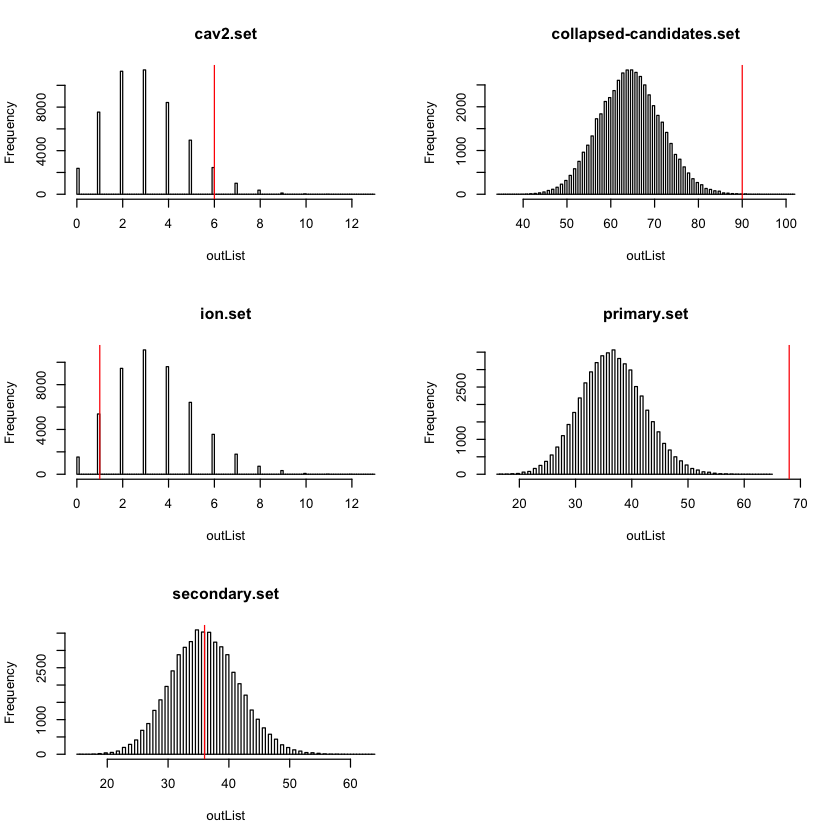

In [10]:
pList <- NULL
nG <- NULL
lGeneSet <- NULL

par(mfrow = c(3, 2))
for (kk in c(1, 2, 5:7)){
x1 <- read.table(paste(dirF, "/", fileN[kk], sep = ""))
xFMRP <- as.character(x1[, 1])
xFMRP <- unique(xFMRP)

l1 <- length(xFMRP)
lGeneSet[kk] <- l1
    
nSample <- 50000 ##Number of sampling from all genes
outList <- NULL

xIntersect <- length(intersect(xFMRP, xResult))
nG[kk] <- xIntersect
for (i in 1:nSample){
  tempGene <- sample(xAll, l1)
  outList[i] <- length(intersect(tempGene, xResult))
  
}

#plot(density(outList))
#abline(v = xIntersect)
pList[kk] <- length(outList[outList >= xIntersect])/nSample

#    1- pnorm(xIntersect, mean(outList), sd = sd(outList))

    hist(outList, 100, main = fileN[kk], xlim = range(c(outList, xIntersect + 1)))
    abline(v = xIntersect, col = 'red')
    
}


In [11]:
outD <- cbind(fileN, pList, nG, lGeneSet)
colnames(outD) <- c("gene_set_name", "pValue", "nOverlappingGene", "GeneSetLength")
outD

gene_set_name,pValue,nOverlappingGene,GeneSetLength
cav2.set,0.07982,6,206
collapsed-candidates.set,0.00042,90,4465
gene-families.set,NA,NA,NA
go.set,NA,NA,NA
ion.set,0.96926,1,237
primary.set,0,68,2546
secondary.set,0.54574,36,2507


### Based on the table above, the overlapping proportion between *primary.set* and *309 genes* is higher than expected by chance.


### Take a loser look for the primary.set

In [13]:
allFile <- read.table("/Users/hoang/Documents/SaveDataFromServer/set_genelist/genelists/purcell_swedex_sets/primary.set")

In [14]:
go1 <- split(allFile, allFile[, 2])

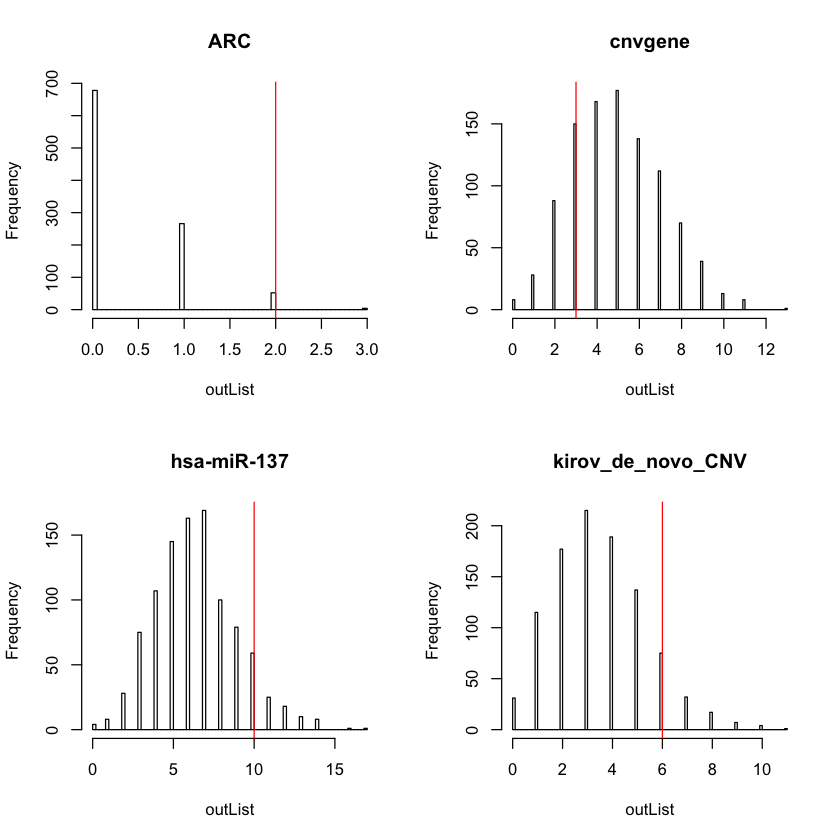

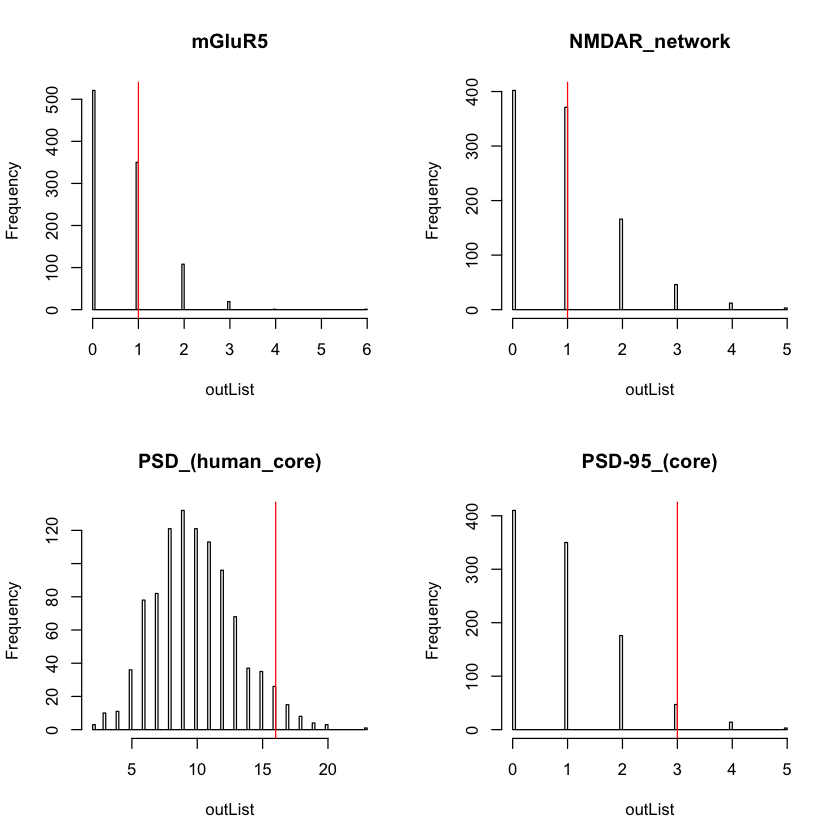

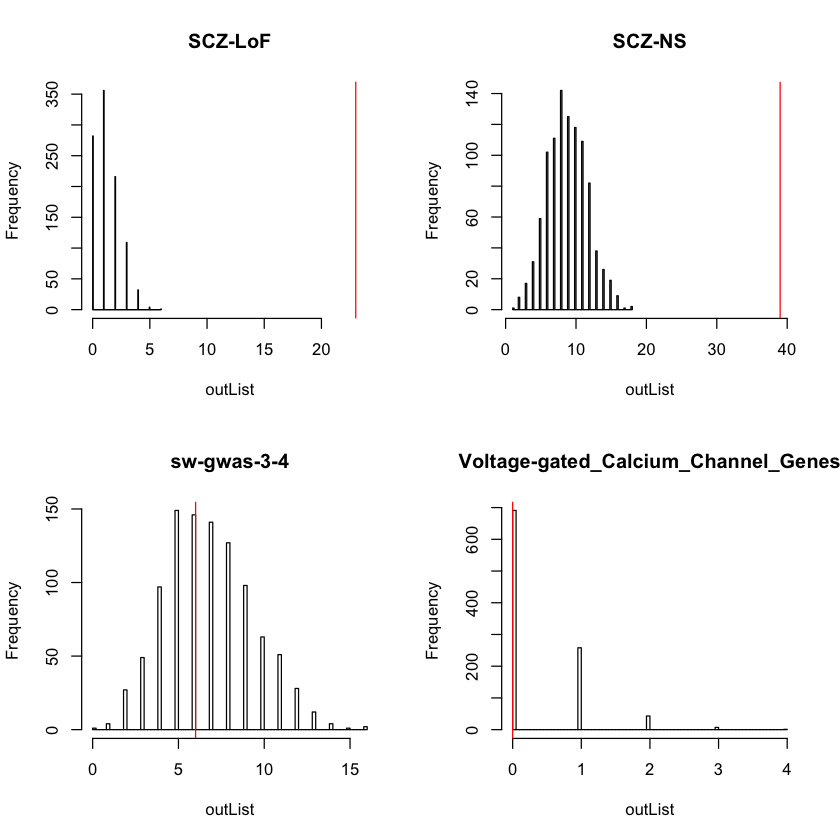

In [15]:
pList <- NULL
nameGeneSet <- NULL
nOverlappingGene <- NULL
lGeneSet <- NULL

par(mfrow = c(2, 2))
for (kk in 1:length(go1)){
#  x1 <- read.table(paste(dirF, "/", fileN[kk], sep = ""))
  x1 <- as.character(go1[[kk]][, 1])
#  xFMRP <- as.character(x1[, 1])
    xFMRP <- x1
  xFMRP <- unique(xFMRP)
  
  l1 <- length(xFMRP)
    lGeneSet[kk] <- l1
  nameGeneSet[kk] <- as.character(go1[[kk]][1, 2])
    
  nSample <- 1000 ##Number of sampling from all genes
  outList <- NULL
  
  xIntersect <- length(intersect(xFMRP, xResult))
  
    nOverlappingGene[kk] <- xIntersect
    
  for (i in 1:nSample){
    tempGene <- sample(xAll, l1)
    outList[i] <- length(intersect(tempGene, xResult))
    
  }
  pList[kk] <- length(outList[outList >= xIntersect])/nSample
    
       hist(outList, 100, main = nameGeneSet[kk], xlim = range(c(outList, xIntersect + 1)))
    abline(v = xIntersect, col = 'red')
    
  
  
}


In [16]:
outD <- cbind(nameGeneSet, pList, nOverlappingGene, lGeneSet, 100*round(nOverlappingGene/309, 4))
colnames(outD) <- c("gene_set_name", "pValue", "nOverlappingGene", "GeneSetLength", "Overlapping Percentage")
outD[order(outD[, 2]) ,]

gene_set_name,pValue,nOverlappingGene,GeneSetLength,Overlapping Percentage
SCZ-LoF,0,23,87,7.44
SCZ-NS,0,39,611,12.62
ARC,0.056,2,28,0.65
PSD_(human_core),0.057,16,685,5.18
PSD-95_(core),0.064,3,65,0.97
hsa-miR-137,0.122,10,446,3.24
kirov_de_novo_CNV,0.136,6,234,1.94
mGluR5,0.479,1,39,0.32
NMDAR_network,0.598,1,61,0.32
sw-gwas-3-4,0.673,6,479,1.94


### The secondary.set

In [17]:
allFile <- read.table("/Users/hoang/Documents/SaveDataFromServer/set_genelist/genelists/purcell_swedex_sets/secondary.set")

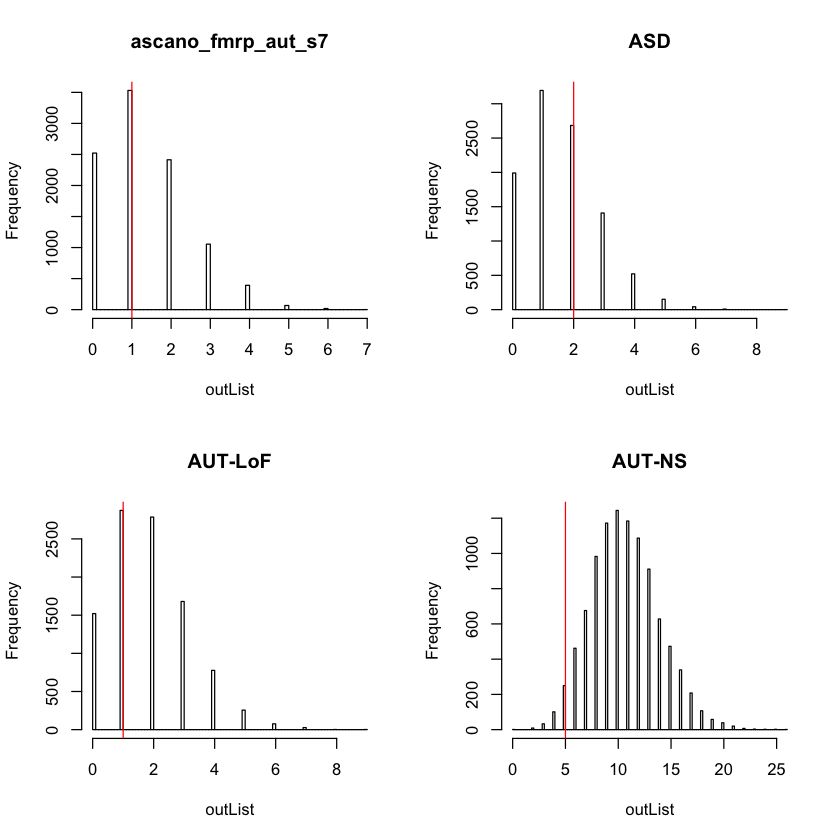

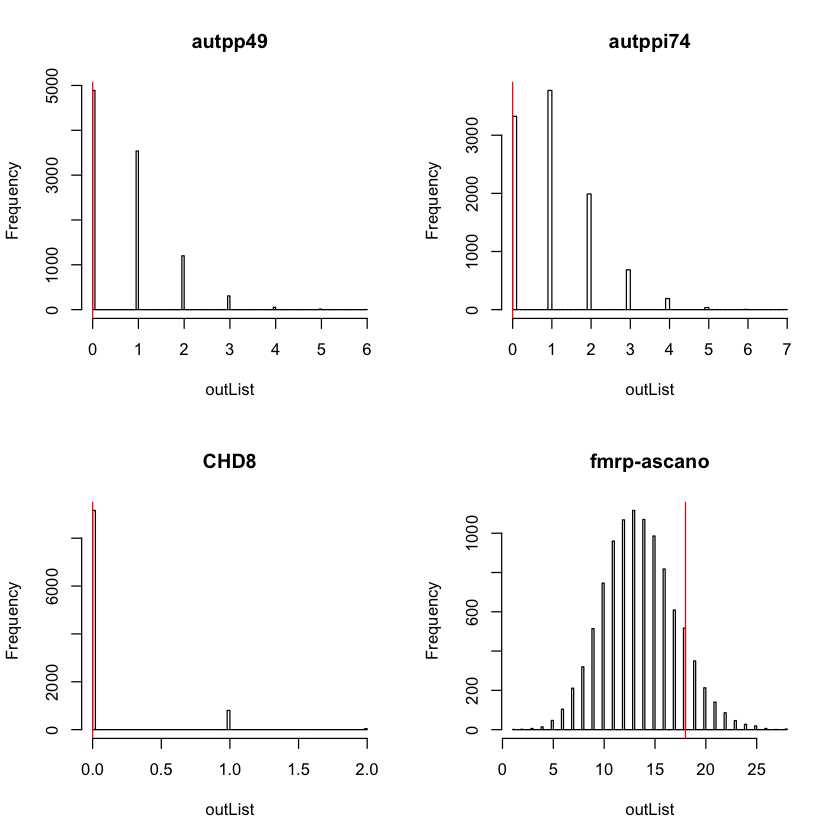

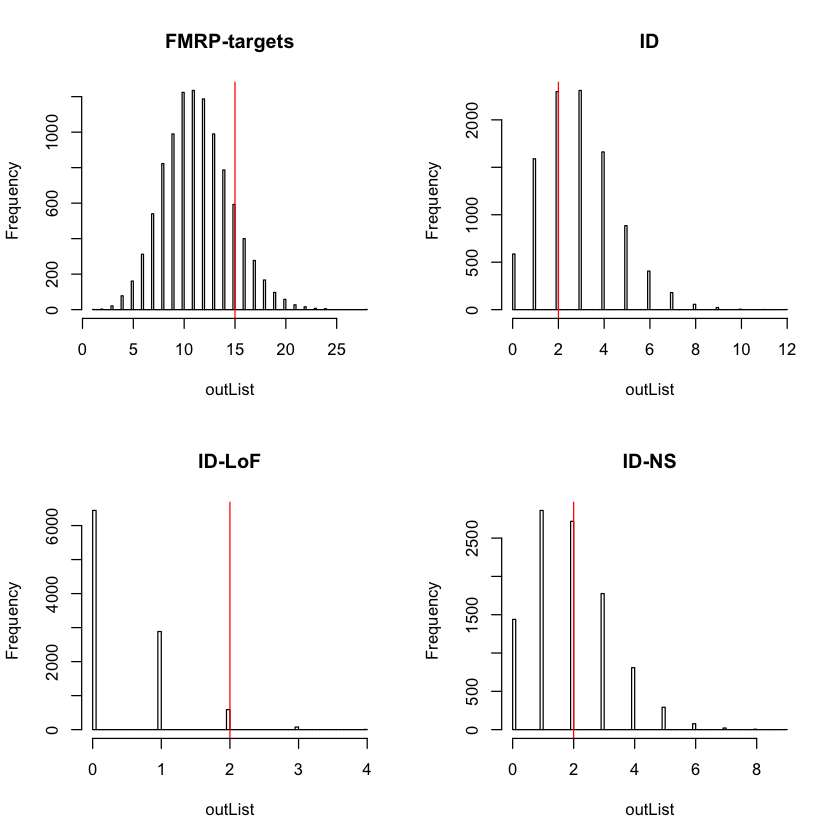

In [18]:
go1 <- split(allFile, allFile[, 2])
pList <- NULL
nameGeneSet <- NULL
nOverlappingGene <- NULL
lGeneSet <- NULL

par(mfrow = c(2, 2))
for (kk in 1:length(go1)){
#  x1 <- read.table(paste(dirF, "/", fileN[kk], sep = ""))
  x1 <- as.character(go1[[kk]][, 1])
#  xFMRP <- as.character(x1[, 1])
    xFMRP <- x1
  xFMRP <- unique(xFMRP)
  
  l1 <- length(xFMRP)
    lGeneSet[kk] <- l1
  nameGeneSet[kk] <- as.character(go1[[kk]][1, 2])
    
  nSample <- 10000 ##Number of sampling from all genes
  outList <- NULL
  
  xIntersect <- length(intersect(xFMRP, xResult))
  
    nOverlappingGene[kk] <- xIntersect
    
  for (i in 1:nSample){
    tempGene <- sample(xAll, l1)
    outList[i] <- length(intersect(tempGene, xResult))
    
  }
  pList[kk] <- length(outList[outList >= xIntersect])/nSample
    
       hist(outList, 100, main = nameGeneSet[kk], xlim = range(c(outList, xIntersect + 1)))
    abline(v = xIntersect, col = 'red')
    
  
  
}


In [19]:
outD <- cbind(nameGeneSet, pList, nOverlappingGene, lGeneSet, 100*round(nOverlappingGene/309, 4))
colnames(outD) <- c("gene_set_name", "pValue", "nOverlappingGene", "GeneSetLength", "Overlapping Percentage")
outD[order(outD[, 2]) ,]

gene_set_name,pValue,nOverlappingGene,GeneSetLength,Overlapping Percentage
ID-LoF,0.067,2,30,0.65
fmrp-ascano,0.1408,18,939,5.83
FMRP-targets,0.1648,15,788,4.85
ASD,0.4815,2,112,0.65
ID-NS,0.57,2,132,0.65
ascano_fmrp_aut_s7,0.7478,1,93,0.32
ID,0.7824,2,196,0.65
AUT-LoF,0.8479,1,128,0.32
AUT-NS,0.9856,5,743,1.62
autpp49,1,0,49,0


## The brainspan.set

In [20]:
allFile <- read.table("/Users/hoang/Documents/SaveDataFromServer/set_genelist/brainspan.set")

In [21]:
head(allFile)

,V1,V2
1,A1CF,LOW
2,A2M,HIGH
3,A2M,POST
4,A2ML1,LOW
5,A3GALT2,LOW
6,A4GALT,POST


In [22]:
go1 <- split(allFile, allFile[, 2])

In [23]:
table(allFile[, 2])


  CACN-HIGH    CACN-LOW   CACN-POST    CACN-PRE DENOVO-HIGH  DENOVO-LOW 
         15           7           6           6         387         170 
DENOVO-POST  DENOVO-PRE   FMRP-HIGH    FMRP-LOW   FMRP-POST    FMRP-PRE 
         81         338         706           3         193         359 
       HIGH         LOW    one-HIGH     one-LOW    one-POST     one-PRE 
       9378        6259        1417         165         391         835 
       POST         PRE    PSD-HIGH     PSD-LOW    PSD-POST     PSD-PRE 
       2432        8052         685           6         205         293 

In [24]:
length(go1)
head(go1[[1]])
length(go1)

[1] 24

,V1,V2
31802,CACNA1A,CACN-HIGH
31803,CACNA1B,CACN-HIGH
31804,CACNA1E,CACN-HIGH
31805,CACNA1G,CACN-HIGH
31806,CACNA1H,CACN-HIGH
31807,CACNA2D1,CACN-HIGH


[1] 24

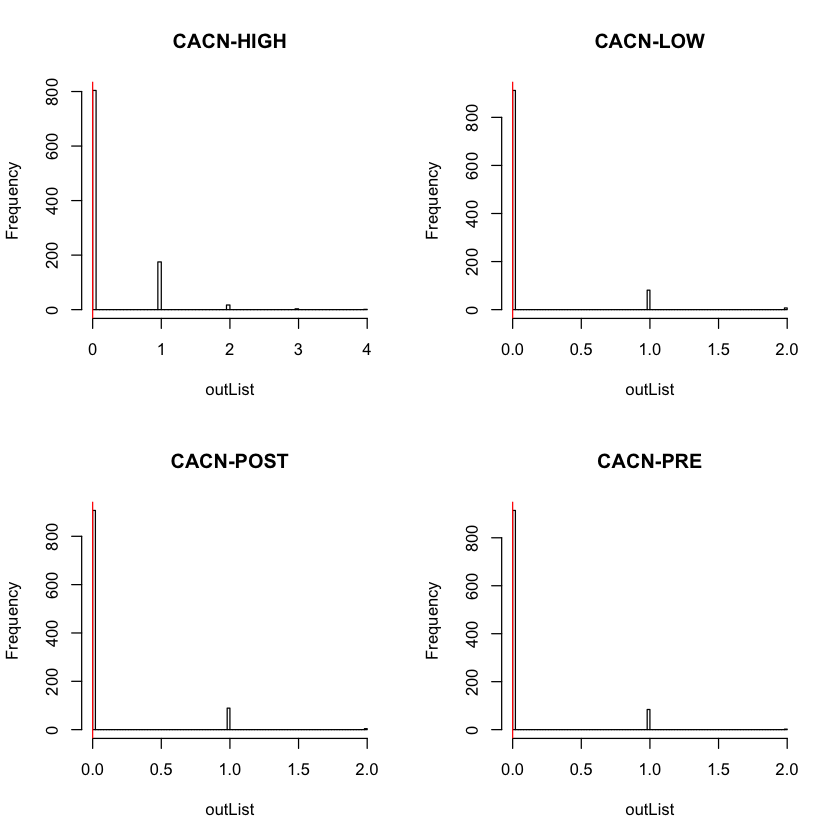

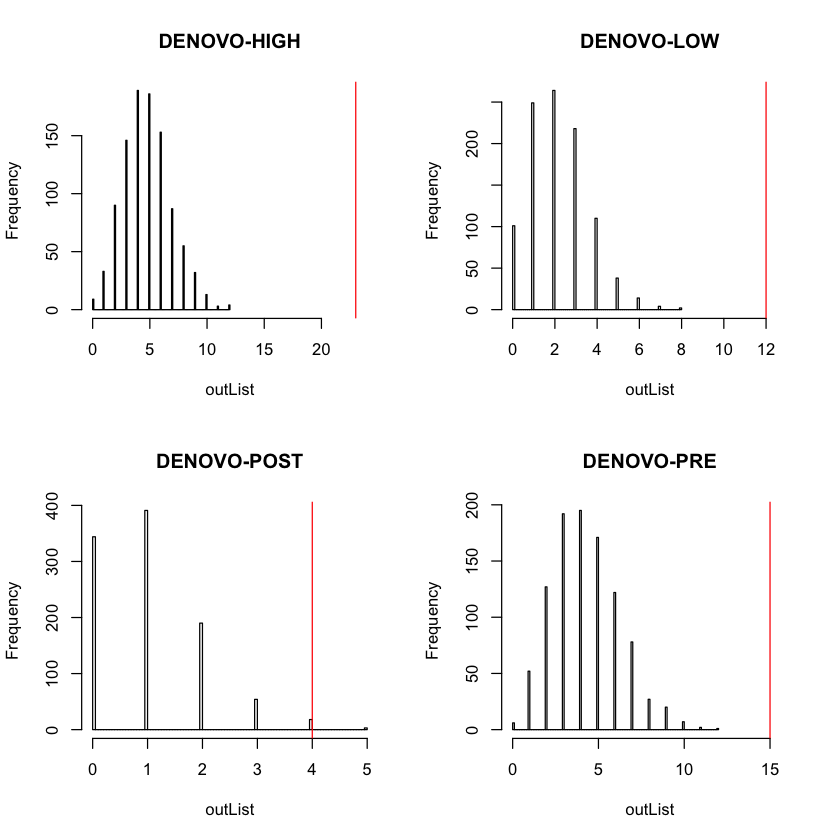

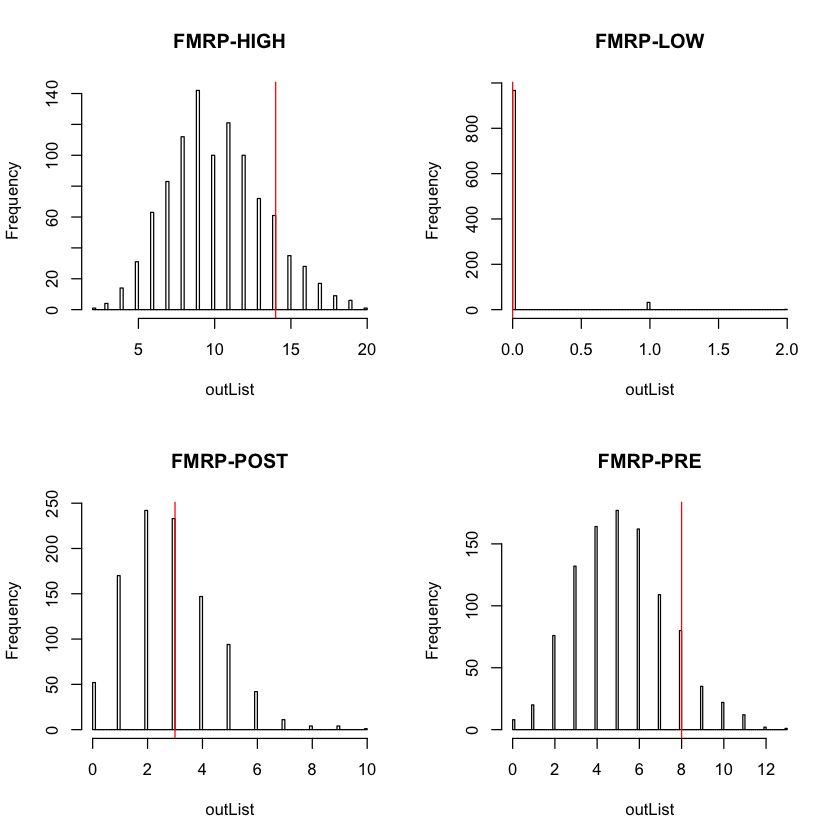

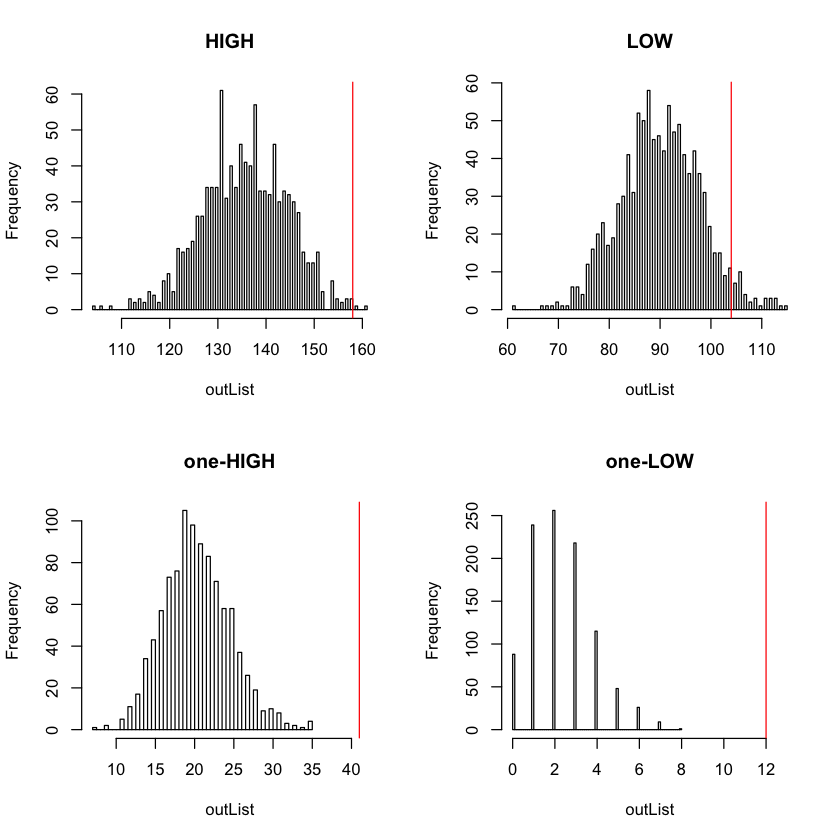

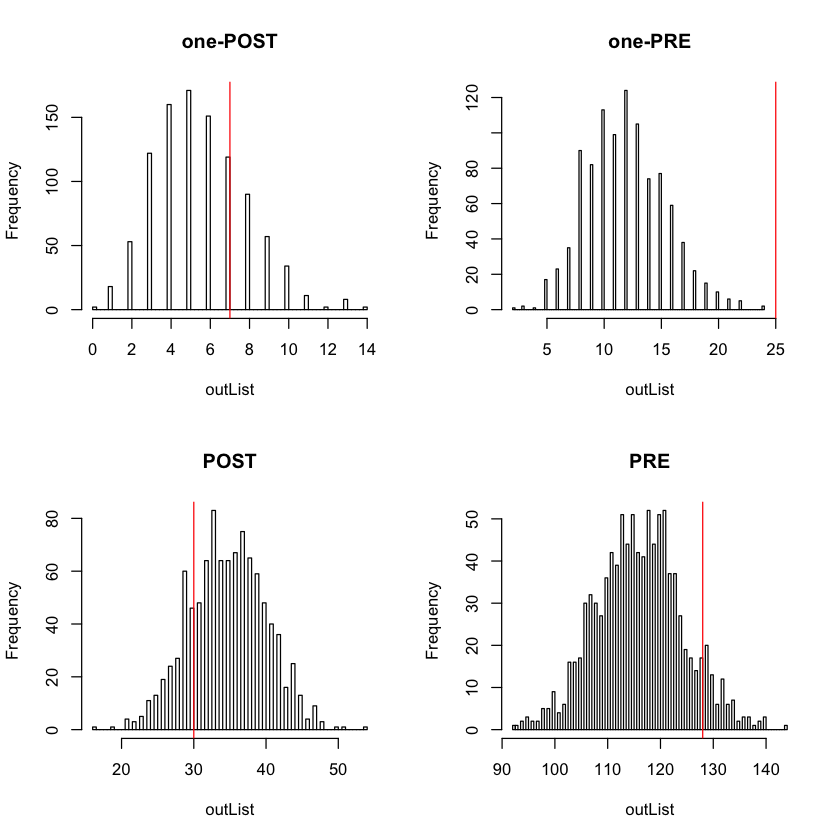

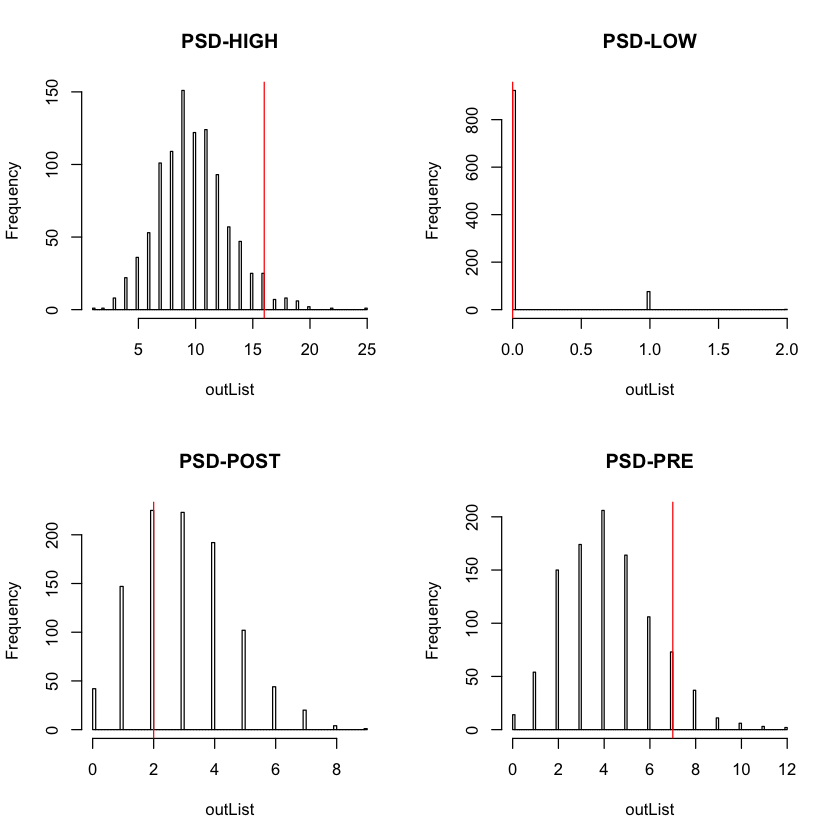

In [25]:
pList <- NULL
nameGeneSet <- NULL
nOverlappingGene <- NULL
lGeneSet <- NULL

par(mfrow = c(2, 2))
for (kk in 1:length(go1)){
#  x1 <- read.table(paste(dirF, "/", fileN[kk], sep = ""))
  x1 <- as.character(go1[[kk]][, 1])
#  xFMRP <- as.character(x1[, 1])
    xFMRP <- x1
  xFMRP <- unique(xFMRP)
  
  l1 <- length(xFMRP)
    lGeneSet[kk] <- l1
  nameGeneSet[kk] <- as.character(go1[[kk]][1, 2])
    
  nSample <- 1000 ##Number of sampling from all genes
  outList <- NULL
  
  xIntersect <- length(intersect(xFMRP, xResult))
  
    nOverlappingGene[kk] <- xIntersect
    
  for (i in 1:nSample){
    tempGene <- sample(xAll, l1)
    outList[i] <- length(intersect(tempGene, xResult))
    
  }
  pList[kk] <- length(outList[outList >= xIntersect])/nSample
    #1- pnorm(xIntersect, mean(outList), sd = sd(outList))
    
       hist(outList, 100, main = nameGeneSet[kk], xlim = range(c(outList, xIntersect + 1)))
    abline(v = xIntersect, col = 'red')
    
  
  
}


In [26]:
outD <- cbind(nameGeneSet, pList, nOverlappingGene, lGeneSet, 100*round(nOverlappingGene/309, 4))
colnames(outD) <- c("gene_set_name", "pValue", "nOverlappingGene", "GeneSetLength", "Overlapping Percentage")
outD[order(outD[, 2]) ,]

gene_set_name,pValue,nOverlappingGene,GeneSetLength,Overlapping Percentage
DENOVO-HIGH,0,23,335,7.44
DENOVO-LOW,0,12,152,3.88
DENOVO-PRE,0,15,295,4.85
one-HIGH,0,41,1417,13.27
one-LOW,0,12,165,3.88
one-PRE,0,25,835,8.09
HIGH,0.005,158,9378,51.13
DENOVO-POST,0.021,4,72,1.29
LOW,0.049,104,6259,33.66
PSD-HIGH,0.05,16,685,5.18


In [27]:
go1[[kk]][1, 2]

[1] PSD-PRE
24 Levels: CACN-HIGH CACN-LOW CACN-POST CACN-PRE DENOVO-HIGH ... PSD-PRE

## TEST GO.SET

In [29]:
allFile <- read.table("~/Documents/SaveDataFromServer/set_genelist/genelists/go.set.2columns", sep = " ")

In [30]:
go0 <- split(allFile, allFile[, 2])

In [31]:
c1 <- lapply(go1, function(x) dim(x)[1] )

#lapply(a, Filter, f = function(x) length(x) >= 3)

In [32]:
NN = 10
go1 <- go0[c1 >= NN]
length(go1)

[1] 3004

In [33]:
pList <- NULL
nameGeneSet <- NULL
nOverlappingGene <- NULL
lGeneSet <- NULL

par(mfrow = c(2, 2))
for (kk in 1:length(go1)){
#  x1 <- read.table(paste(dirF, "/", fileN[kk], sep = ""))
  x1 <- as.character(go1[[kk]][, 1])
#  xFMRP <- as.character(x1[, 1])
    xFMRP <- x1
  xFMRP <- unique(xFMRP)
  
  l1 <- length(xFMRP)
    lGeneSet[kk] <- l1
  nameGeneSet[kk] <- as.character(go1[[kk]][1, 2])
    
  nSample <- 1000 ##Number of sampling from all genes
  outList <- NULL
  
  xIntersect <- length(intersect(xFMRP, xResult))
  
    nOverlappingGene[kk] <- xIntersect
    
  for (i in 1:nSample){
    tempGene <- sample(xAll, l1)
    outList[i] <- length(intersect(tempGene, xResult))
    
  }
  pList[kk] <- length(outList[outList >= xIntersect])/nSample
    #1- pnorm(xIntersect, mean(outList), sd = sd(outList))
    
  #     hist(outList, 100, main = nameGeneSet[kk], xlim = range(c(outList, xIntersect + 1)))
   # abline(v = xIntersect, col = 'red')
    
  
  
}


In [34]:
outD <- cbind(nameGeneSet, pList, nOverlappingGene, lGeneSet, 100*round(nOverlappingGene/309, 4))
colnames(outD) <- c("gene_set_name", "pValue", "nOverlappingGene", "GeneSetLength", "Overlapping Percentage")

head(outD[order(outD[, 2]) ,])


gene_set_name,pValue,nOverlappingGene,GeneSetLength,Overlapping Percentage
cellular_component,0,280,17684,90.61
modulation,0.001,5,50,1.62
cell,0.004,245,15519,79.29
protein-N-terminal,0.004,1,1,0.32
C-X-C,0.006,2,9,0.65
photoreactive,0.006,1,1,0.32


In [35]:
dim(outD[outD[, 2] < 0.05, ])

[1] 88  5

In [36]:
outD[outD[, 2] < 0.05, ]

gene_set_name,pValue,nOverlappingGene,GeneSetLength,Overlapping Percentage
(R)-3-amino-2-methylpropionate-pyruvate,0.011,1,1,0.32
[myelin,0.012,1,1,0.32
"1-(4-iodo-2,5-dimethoxyphenyl)propan-2-amine",0.022,1,2,0.32
10-formyltetrahydrofolate,0.025,1,2,0.32
3-hydroxyisobutyryl-CoA,0.019,1,1,0.32
acetyltransferase,0.021,5,97,1.62
aerobic,0.038,3,49,0.97
alanine-glyoxylate,0.046,1,3,0.32
androgen,0.037,3,47,0.97
AP-type,0.017,3,39,0.97


In [37]:
min(outD[, 2])

[1] "0"